# XGBoost and Text Classification

In [12]:
import sklearn
import xgboost as xgb
import pandas as pd
from sklearn import datasets

In [7]:
dic  = datasets.load_breast_cancer()

In [9]:
X = dic["data"]
y = dic["target"]

## 1. XGBoost Documentation

### Data Interface

XGBoost has its own ddata structure, that can load matrices from Numpy 2D and Pandas DataFrames. Data is stored as a DMatrix object. DMatrix does not support categorical variables (must be OneHotEncoded)

- To load a CSV file into DMatrix:

Load with Pandas -> convert to DMatrix. (DMatrix cant decipher csvs with headers.)


#### Load a Numpy Array

<code>data = np.random.rand(5, 10)  # 5 entities, each contains 10 features
label = np.random.randint(2, size=5)  # binary target
dtrain = xgb.DMatrix(data, label=label)</code>

In [17]:
dtrain = xgb.DMatrix(X,label=y)
dtrain

#### To load a scipy.sparse array into DMatrix:

<code>csr = scipy.sparse.csr_matrix((dat, (row, col)))
dtrain = xgb.DMatrix(csr)</code>

#### To Load a Pandas DataFrame

<code> data = pandas.DataFrame(np.arange(12).reshape((4,3)), columns=['a', 'b', 'c'])
label = pandas.DataFrame(np.random.randint(2, size=4))
dtrain = xgb.DMatrix(data, label=label)</code>

In [15]:
df = pd.DataFrame(X)
df.head()

0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9    ...        20     21      22      23      24      25      26  \
0  0.07871   ...     25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119   
1  0.05667   ...     24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416   
2  0.05999   ...     23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504   
3  0.09744   ...     14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869   
4  0.05883   ...     22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000   

       27      28       29  
0  0.2654  0.4601  0.11890  
1  0.1860  0.2750  0.08902  
2  0.2430  0.3613  0.08758  
3  0.2575  0.6638  0.17300  
4  0.1625  0.2364  0.07678  

[5 rows x 30 columns]

In [16]:
dtrain = xgb.DMatrix(df)

### Setting Parameters

You can give XGBoost a dictionary of hyperparameter to tune off of. 

    

In [20]:
param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic'}


### Training

Training a model requires a parameter list and a dataset.






In [23]:
bst = xgb.train(param, dtrain, num_boost_round = 10)

## XGBoost's Hyperparameters

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [25]:
clf = xgb.XGBClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\Harrison\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9736842105263158

### Feature Importance with XGB


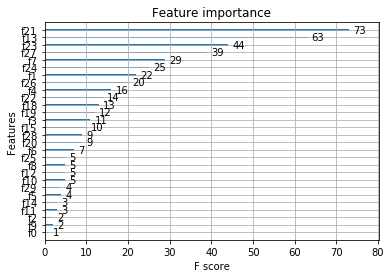

In [27]:
import matplotlib.pyplot as plt
xgb.plot_importance(clf)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [28]:
X, y = datasets.make_classification(n_samples=10000, n_features=20,  
                                    n_informative=2, n_redundant=10,
                                    random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  
                                                    random_state=42)

In [31]:
clf = xgb.XGBClassifier()  # and for classifier  
clf.fit(X_train, y_train)  
clf.score(X_test,y_test)  

C:\Users\Harrison\Anaconda3\envs\py36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.939

# Parameter Tuning

Best to use Randomized Search rather than Grid Search. <i>"if the close-to-optimal region of hyperparameters occupies at least 5% of the grid surface, then random search with 60 trials will find that region with high probability."</i>

https://stats.stackexchange.com/questions/160479/practical-hyperparameter-optimization-random-vs-grid-search

http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf

In [36]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

clf = xgb.XGBClassifier()
gs = RandomizedSearchCV(clf, params,n_iter=50, n_jobs=-1)  
gs.fit(X_train, y_train)  
gs.best_estimator_  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.9669591558716182,
       gamma=9.207360813953322, learning_rate=0.17929470183034074,
       max_delta_step=0, max_depth=25, min_child_weight=5.837225794425977,
       missing=None, n_estimators=19, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0,
       reg_alpha=11.784595672041155, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.7599399616483714, verbosity=1)

In [37]:
gs.best_score_

0.9395714285714286

In [38]:
gs.best_params_

{'colsample_bytree': 0.9669591558716182,
 'gamma': 9.207360813953322,
 'learning_rate': 0.17929470183034074,
 'max_depth': 25,
 'min_child_weight': 5.837225794425977,
 'n_estimators': 19,
 'reg_alpha': 11.784595672041155,
 'subsample': 0.7599399616483714}

# Parameter Tuning XGBoost


## Types of Parameters

